In [54]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3992a387-292e-4162-8a88-fd0bca2631f6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

{'status': {'timestamp': '2024-01-24T17:33:54.641Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 8818}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10783, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [55]:
type(data)

dict

In [56]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [57]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10783,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.960729e+07,1.960729e+07,False,NaN,1,NaN,NaN,None,2024-01-24T17:32:00.000Z,40050.816586,2.385403e+10,-28.4848,-0.007685,1.605208,-5.565336,-8.203037,6.002989,18.290999,7.852879e+11,50.3429,8.410671e+11,None,2024-01-24T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 12:34:11.572852
1,1027,Ethereum,ETH,ethereum,8326,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201791e+08,1.201791e+08,True,NaN,2,NaN,NaN,None,2024-01-24T17:32:00.000Z,2232.304839,1.101565e+10,-34.3425,-0.136587,0.646147,-11.836474,-2.139235,7.467057,25.526246,2.682764e+11,17.1986,2.682764e+11,None,2024-01-24T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 12:34:11.572852
2,825,Tether USDt,USDT,tether,72927,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.557682e+10,9.860077e+10,True,NaN,3,NaN,NaN,None,2024-01-24T17:31:00.000Z,0.999470,4.100739e+10,-27.7752,0.003804,0.044445,0.014088,-0.050903,-0.100177,-0.047053,9.552619e+10,6.1183,9.854854e+10,None,2024-01-24T17:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-24 12:34:11.572852
3,1839,BNB,BNB,bnb,2034,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495482e+08,1.495482e+08,False,NaN,4,NaN,NaN,None,2024-01-24T17:31:00.000Z,293.325079,9.735941e+08,-10.1845,-0.096763,-1.160525,-5.732297,10.122402,25.565404,32.625047,4.386622e+10,2.8095,4.386622e+10,None,2024-01-24T17:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 12:34:11.572852
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.331523e+08,5.678930e+08,True,NaN,5,NaN,NaN,None,2024-01-24T17:32:00.000Z,87.161224,2.510731e+09,-24.1884,0.200341,5.180977,-11.551506,-29.441979,47.982776,179.728352,3.775409e+10,2.4203,4.949825e+10,None,2024-01-24T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 12:34:11.572852
5,52,XRP,XRP,xrp,1216,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.433984e+10,9.998798e+10,False,NaN,6,NaN,NaN,None,2024-01-24T17:32:00.000Z,0.516238,9.658669e+08,-34.3815,0.100278,1.139081,-8.835399,-18.539411,-16.926676,-6.497396,2.805230e+10,1.7984,5.162383e+10,None,2024-01-24T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 12:34:11.572852
6,3408,USDC,USDC,usd-coin,16364,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.575495e+10,2.575495e+10,False,NaN,7,NaN,NaN,None,2024-01-24T17:32:00.000Z,1.000014,5.710552e+09,-24.5383,-0.010547,-0.003585,-0.012645,0.002693,0.015435,0.003684,2.575532e+10,1.6511,2.575532e+10,None,2024-01-24T17:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-24 12:34:11.572852
7,2010,Cardano,ADA,cardano,1038,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.541073e+10,3.655708e+10,False,NaN,8,NaN,NaN,None,2024-01-24T17:31:00.000Z,0.475494,4.159733e+08,-29.1114,0.722650,1.535039,-9.825123,-23.606648,20.926651,66.347322,1.683759e+10,1.0784,2.139724e+10,None,2024-01-24T17:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 12:34:11.572852
8,5805,Avalanche,AVAX,avalanche,647,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capit

In [82]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3992a387-292e-4162-8a88-fd0bca2631f6',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df2,df_append])
    
     #Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'/Users/pavanjeevanbuddala/Documents/API file/API.csv'):
        df.to_csv(r'/Users/pavanjeevanbuddala/Documents/API file/API.csv',mode='w')
    else:
        df.to_csv(r'/Users/pavanjeevanbuddala/Documents/API file/API.csv', mode='a',header=False)
  

In [83]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [84]:
df72 = pd.read_csv(r'/Users/pavanjeevanbuddala/Documents/API file/API.csv')
df72


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10783,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.960729e+07,1.960729e+07,False,NaN,1,NaN,NaN,NaN,2024-01-24T18:10:00.000Z,39987.012226,2.332095e+10,-30.9661,-0.213353,1.285901,-5.602820,-8.305497,5.777987,17.736138,7.840368e+11,50.2458,8.397273e+11,NaN,2024-01-24T18:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:11:54.652069
1,1,1027,Ethereum,ETH,ethereum,8326,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201791e+08,1.201791e+08,True,NaN,2,NaN,NaN,NaN,2024-01-24T18:10:00.000Z,2223.586715,1.074410e+10,-36.7782,-0.610819,0.433504,-11.997836,-2.549335,7.001429,24.584712,2.672287e+11,17.1256,2.672287e+11,NaN,2024-01-24T18:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:11:54.652069
2,2,825,Tether USDt,USDT,tether,72927,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.557682e+10,9.860077e+10,True,NaN,3,NaN,NaN,NaN,2024-01-24T18:09:00.000Z,0.999635,4.023763e+10,-29.9317,-0.002805,0.059705,0.043067,-0.040241,-0.081051,-0.040710,9.554193e+10,6.1229,9.856478e+10,NaN,2024-01-24T18:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-24 13:11:54.652069
3,3,1839,BNB,BNB,bnb,2034,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495482e+08,1.495482e+08,False,NaN,4,NaN,NaN,NaN,2024-01-24T18:09:00.000Z,292.070893,9.691843e+08,-11.2564,-0.296483,-1.652334,-5.792925,9.586201,24.956535,31.762700,4.367866e+10,2.7992,4.367866e+10,NaN,2024-01-24T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:11:54.652069
4,4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.331523e+08,5.678930e+08,True,NaN,5,NaN,NaN,NaN,2024-01-24T18:10:00.000Z,86.665108,2.471333e+09,-25.5244,-0.746764,4.397551,-12.681641,-30.512503,46.399921,176.385575,3.753920e+10,2.4057,4.921651e+10,NaN,2024-01-24T18:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:11:54.652069
5,5,52,XRP,XRP,xrp,1216,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.433984e+10,9.998798e+10,False,NaN,6,NaN,NaN,NaN,2024-01-24T18:10:00.000Z,0.515706,9.544344e+08,-35.3939,-0.079262,0.741659,-9.327345,-18.883518,-17.009329,-6.653670,2.802338e+10,1.7959,5.157060e+10,NaN,2024-01-24T18:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:11:54.652069
6,6,3408,USDC,USDC,usd-coin,16365,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.575495e+10,2.575495e+10,False,NaN,7,NaN,NaN,NaN,2024-01-24T18:10:00.000Z,1.000122,5.613825e+09,-26.7659,-0.005984,0.003406,-0.029664,0.022939,0.020683,0.002896,2.575808e+10,1.6507,2.575808e+10,NaN,2024-01-24T18:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-24 13:11:54.652069
7,7,2010,Cardano,ADA,cardano,1038,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.541073e+10,3.655708e+10,False,NaN,8,NaN,NaN,NaN,2024-01-24T18:09:00.000Z,0.474842,4.128963e+08,-30.0112,0.236193,1.403707,-10.113720,-23.862296,20.840078,65.782173,1.681449e+10,1.0776,2.136788e+10,NaN,2024-01-24T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:11:54.652069
8,8,5805,Avalanche,AVAX,avalanche,647,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts',

In [85]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10783,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.960735e+07,1.960735e+07,False,NaN,1,NaN,NaN,None,2024-01-24T18:15:00.000Z,39885.318773,2.330662e+10,-31.1280,-0.473579,0.988367,-5.806995,-8.401728,5.560578,17.207077,7.820454e+11,50.2466,8.375917e+11,None,2024-01-24T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:15:57.211903
1,1027,Ethereum,ETH,ethereum,8326,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201791e+08,1.201791e+08,True,NaN,2,NaN,NaN,None,2024-01-24T18:15:00.000Z,2221.155464,1.074556e+10,-36.8807,-0.704216,0.221352,-11.929672,-2.476092,6.969856,24.300129,2.669365e+11,17.1507,2.669365e+11,None,2024-01-24T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:15:57.211903
2,825,Tether USDt,USDT,tether,72927,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.557682e+10,9.860077e+10,True,NaN,3,NaN,NaN,None,2024-01-24T18:14:00.000Z,0.999662,4.021049e+10,-30.1111,0.024296,0.070023,0.041207,-0.046941,-0.082276,-0.059912,9.554451e+10,6.1388,9.856744e+10,None,2024-01-24T18:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-24 13:15:57.211903
3,1839,BNB,BNB,bnb,2034,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495481e+08,1.495481e+08,False,NaN,4,NaN,NaN,None,2024-01-24T18:14:00.000Z,291.912051,9.688633e+08,-11.4590,-0.346692,-1.955017,-5.655156,9.469834,24.923495,31.591159,4.365490e+10,2.8048,4.365490e+10,None,2024-01-24T18:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:15:57.211903
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.331521e+08,5.678927e+08,True,NaN,5,NaN,NaN,None,2024-01-24T18:15:00.000Z,86.632157,2.473675e+09,-25.6324,-0.860833,4.320326,-12.173421,-30.649304,46.556189,176.120544,3.752490e+10,2.4110,4.919777e+10,None,2024-01-24T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:15:57.211903
5,52,XRP,XRP,xrp,1216,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.433984e+10,9.998798e+10,False,NaN,6,NaN,NaN,None,2024-01-24T18:15:00.000Z,0.515601,9.536070e+08,-35.5282,-0.157097,0.671455,-9.221474,-18.879570,-16.994790,-6.727154,2.801767e+10,1.8001,5.156008e+10,None,2024-01-24T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:15:57.211903
6,3408,USDC,USDC,usd-coin,16365,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.578857e+10,2.578857e+10,False,NaN,7,NaN,NaN,None,2024-01-24T18:15:00.000Z,1.000134,5.622708e+09,-26.7157,0.006499,0.012698,-0.008926,0.015819,0.033718,0.016279,2.579203e+10,1.6571,2.579203e+10,None,2024-01-24T18:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-24 13:15:57.211903
7,2010,Cardano,ADA,cardano,1038,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.541121e+10,3.655708e+10,False,NaN,8,NaN,NaN,None,2024-01-24T18:14:00.000Z,0.473730,4.125379e+08,-30.1360,-0.074704,0.954268,-10.067067,-24.107115,20.653163,65.346493,1.677535e+10,1.0778,2.131785e+10,None,2024-01-24T18:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:15:57.211903
8,5805,Avalanche,AVAX,avalanche,647,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capi

In [86]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [87]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10783,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19607350.00000,19607350.00000,False,NaN,1,NaN,NaN,None,2024-01-24T18:15:00.000Z,39885.31877,23306619689.73122,-31.12800,-0.47358,0.98837,-5.80699,-8.40173,5.56058,17.20708,782045405043.21741,50.24660,837591694232.40002,None,2024-01-24T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:15:57.211903
1,1027,Ethereum,ETH,ethereum,8326,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120179114.19818,120179114.19818,True,NaN,2,NaN,NaN,None,2024-01-24T18:15:00.000Z,2221.15546,10745564613.29012,-36.88070,-0.70422,0.22135,-11.92967,-2.47609,6.96986,24.30013,266936496184.86978,17.15070,266936496184.87000,None,2024-01-24T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:15:57.211903
2,825,Tether USDt,USDT,tether,72927,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,95576820991.71840,98600769245.77875,True,NaN,3,NaN,NaN,None,2024-01-24T18:14:00.000Z,0.99966,40210491041.85060,-30.11110,0.02430,0.07002,0.04121,-0.04694,-0.08228,-0.05991,95544509663.77332,6.13880,98567435622.02000,None,2024-01-24T18:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-24 13:15:57.211903
3,1839,BNB,BNB,bnb,2034,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149548137.34564,149548137.34564,False,NaN,4,NaN,NaN,None,2024-01-24T18:14:00.000Z,291.91205,968863288.20452,-11.45900,-0.34669,-1.95502,-5.65516,9.46983,24.92350,31.59116,43654903484.68724,2.80480,43654903484.69000,None,2024-01-24T18:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:15:57.211903
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,433152056.34002,567892718.08339,True,NaN,5,NaN,NaN,None,2024-01-24T18:15:00.000Z,86.63216,2473674559.13476,-25.63240,-0.86083,4.32033,-12.17342,-30.64930,46.55619,176.12054,37524897015.72949,2.41100,49197771198.70000,None,2024-01-24T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:15:57.211903
5,52,XRP,XRP,xrp,1216,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54339837528.00000,99987984506.00000,False,NaN,6,NaN,NaN,None,2024-01-24T18:15:00.000Z,0.51560,953606950.37740,-35.52820,-0.15710,0.67146,-9.22147,-18.87957,-16.99479,-6.72715,28017665921.70004,1.80010,51560084086.12000,None,2024-01-24T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-24 13:15:57.211903
6,3408,USDC,USDC,usd-coin,16365,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25788567022.08524,25788567022.08524,False,NaN,7,NaN,NaN,None,2024-01-24T18:15:00.000Z,1.00013,5622708009.09233,-26.71570,0.00650,0.01270,-0.00893,0.01582,0.03372,0.01628,25792028781.84733,1.65710,25792028781.85000,None,2024-01-24T18:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-24 13:15:57.211903
7,2010,Cardano,ADA,cardano,1038,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35411212873.37700,36557079073.56500,False,NaN,8,NaN,NaN,None,2024-01-24T18:14:00.000Z,0.47373,412537912.08520,-30.13600,-0.07470,0.95427,-10.06707,-24.10712,20.65316,65.34649,16775352992.73975,1.07780,21317848879.47000,None,2024-01-24T18:14

In [88]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.47358,0.98837,-5.80699,-8.40173,5.56058,17.20708
Ethereum,-0.70422,0.22135,-11.92967,-2.47609,6.96986,24.30013
Tether USDt,0.02430,0.07002,0.04121,-0.04694,-0.08228,-0.05991
BNB,-0.34669,-1.95502,-5.65516,9.46983,24.92350,31.59116
Solana,-0.86083,4.32033,-12.17342,-30.64930,46.55619,176.12054
XRP,-0.15710,0.67146,-9.22147,-18.87957,-16.99479,-6.72715
USDC,0.00650,0.01270,-0.00893,0.01582,0.03372,0.01628
Cardano,-0.07470,0.95427,-10.06707,-24.10712,20.65316,65.34649
Avalanche,-1.43519,5.67166,-13.19255,-35.98816,46.03437,188.98920


In [89]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.47358
             quote.USD.percent_change_24h     0.98837
             quote.USD.percent_change_7d     -5.80699
             quote.USD.percent_change_30d    -8.40173
             quote.USD.percent_change_60d     5.56058
             quote.USD.percent_change_90d    17.20708
Ethereum     quote.USD.percent_change_1h     -0.70422
             quote.USD.percent_change_24h     0.22135
             quote.USD.percent_change_7d    -11.92967
             quote.USD.percent_change_30d    -2.47609
             quote.USD.percent_change_60d     6.96986
             quote.USD.percent_change_90d    24.30013
Tether USDt  quote.USD.percent_change_1h      0.02430
             quote.USD.percent_change_24h     0.07002
             quote.USD.percent_change_7d      0.04121
             quote.USD.percent_change_30d    -0.04694
             quote.USD.percent_change_60d    -0.08228
             quote.USD.percent_change_90

In [90]:
type(df4)

pandas.core.series.Series

In [91]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.47358
            quote.USD.percent_change_24h   0.98837
            quote.USD.percent_change_7d   -5.80699
            quote.USD.percent_change_30d  -8.40173
            quote.USD.percent_change_60d   5.56058
            quote.USD.percent_change_90d  17.20708
Ethereum    quote.USD.percent_change_1h   -0.70422
            quote.USD.percent_change_24h   0.22135
            quote.USD.percent_change_7d  -11.92967
            quote.USD.percent_change_30d  -2.47609
            quote.USD.percent_change_60d   6.96986
            quote.USD.percent_change_90d  24.30013
Tether USDt quote.USD.percent_change_1h    0.02430
            quote.USD.percent_change_24h   0.07002
            quote.USD.percent_change_7d    0.04121
            quote.USD.percent_change_30d  -0.04694
            quote.USD.percent_change_60d  -0.08228
            quote.USD.percent_change_90d  -0.05991
BNB         quote.USD.percent_change_1h   -0.34669
            quote.USD.percent_change_24h  -1.95502
            quote.USD.percent_change_7d   -5.65516
            quote.USD.percent_change_30d   9.46983
            quote.USD.percent_change_60d  24.92350
            quote.USD.percent_change_90d  31.59116
Solana      quote.USD.percent_change_1h   -0.86083
            quote.USD.percent_change_24h   4.32033
            quote.USD.percent_change_7d  -12.17342
            quote.USD.percent_change_30d -30.64930
            quote.USD.percent_change_60d  46.55619
            quote.USD.percent_change_90d 176.12054
XRP         quote.USD.percent_change_1h   -0.15710
            quote.USD.percent_change_24h   0.67146
            quote.USD.percent_change_7d   -9.22147
            quote.USD.percent_change_30d -18.87957
            quote.USD.percent_change_60d -16.99479
            quote.USD.percent_change_90d  -6.72715
USDC        quote.USD.percent_change_1h    0.00650
            quote.USD.percent_change_24h   0.01270
            quote.USD.percent_change_7d   -0.00893
            quote.USD.percent_change_30d   0.01582
            quote.USD.percent_change_60d   0.03372
            quote.USD.percent_change_90d   0.01628
Cardano     quote.USD.percent_change_1h   -0.07470
            quote.USD.percent_change_24h   0.95427
            quote.USD.percent_change_7d  -10.06707
            quote.USD.percent_change_30d -24.10712
            quote.USD.percent_change_60d  20.65316
            quote.USD.percent_change_90d  65.34649
Avalanche   quote.USD.percent_change_1h   -1.43519
            quote.USD.percent_change_24h   5.67166
            quote.USD.percent_change_7d  -13.19255
            quote.USD.percent_change_30d -35.98816
            quote.USD.percent_change_60d  46.03437
            quote.USD.percent_change_90d 188.98920
Dogecoin    quote.USD.percent_change_1h   -0.76367
            quote.USD.percent_change_24h   1.14969
            quote.USD.percent_change_7d   -1.89422
            quote.USD.percent_change_30d -16.59457
            quote.USD.percent_change_60d  -0.39073
            quote.USD.percent_change_90d  10.41929
TRON        quote.USD.percent_change_1h   -0.09325
            quote.USD.percent_change_24h   1.55858
            quote.USD.percent_change_7d    0.68421
            quote.USD.percent_change_30d   1.93437
            quote.USD.percent_change_60d   1.95718
            quote.USD.percent_change_90d  17.51030
Polkadot    quote.USD.percent_change_1h   -1.24649
            quote.USD.percent_change_24h   0.66921
            quote.USD.percent_change_7d  -13.03073
            quote.USD.percent_change_30d -31.47323
            quote.USD.percent_change_60d  18.74768
            quote.USD.percent_change_90d  50.32549
Chainlink   quote.USD.percent_change_1h    0.06239
            quote.USD.percent_change_24h   0.01309
            quote.USD.percent_change_7d   -9.68834
            quote.USD.percent_change_30d  -8.41669
            quote.USD.percent_change_60d  -4.35489
            quo

In [92]:
df5.count()

values    90
dtype: int64

In [96]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
#df6 = df5.set_index(index)
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.47358
1,Bitcoin,quote.USD.percent_change_24h,0.98837
2,Bitcoin,quote.USD.percent_change_7d,-5.80699
3,Bitcoin,quote.USD.percent_change_30d,-8.40173
4,Bitcoin,quote.USD.percent_change_60d,5.56058
5,Bitcoin,quote.USD.percent_change_90d,17.20708
6,Ethereum,quote.USD.percent_change_1h,-0.70422
7,Ethereum,quote.USD.percent_change_24h,0.22135
8,Ethereum,quote.USD.percent_change_7d,-11.92967
9,Ethereum,quote.USD.percent_change_30d,-2.47609


In [99]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.47358
1,Bitcoin,quote.USD.percent_change_24h,0.98837
2,Bitcoin,quote.USD.percent_change_7d,-5.80699
3,Bitcoin,quote.USD.percent_change_30d,-8.40173
4,Bitcoin,quote.USD.percent_change_60d,5.56058
5,Bitcoin,quote.USD.percent_change_90d,17.20708
6,Ethereum,quote.USD.percent_change_1h,-0.70422
7,Ethereum,quote.USD.percent_change_24h,0.22135
8,Ethereum,quote.USD.percent_change_7d,-11.92967
9,Ethereum,quote.USD.percent_change_30d,-2.47609


In [103]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.47358
1,Bitcoin,24h,0.98837
2,Bitcoin,7d,-5.80699
3,Bitcoin,30d,-8.40173
4,Bitcoin,60d,5.56058
5,Bitcoin,90d,17.20708
6,Ethereum,1h,-0.70422
7,Ethereum,24h,0.22135
8,Ethereum,7d,-11.92967
9,Ethereum,30d,-2.47609


In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/pavanjeevanbuddala/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


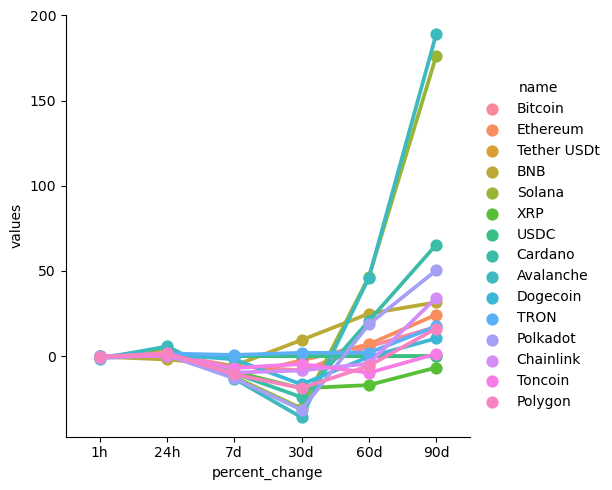

In [105]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [120]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df72[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,39987.01223,2024-01-24 13:11:54.652069
15,Bitcoin,39951.74313,2024-01-24 13:12:56.174427
30,Bitcoin,39962.16699,2024-01-24 13:13:56.433707
45,Bitcoin,39895.01134,2024-01-24 13:14:56.664950
60,Bitcoin,39885.31877,2024-01-24 13:15:57.211903


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

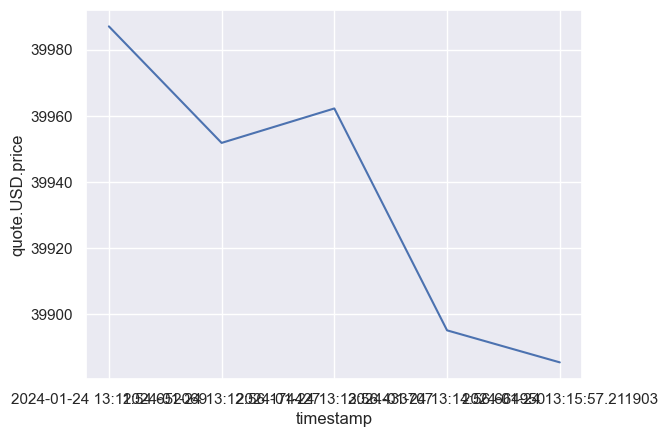

In [121]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)